# <font color='darkblue'>Simulações de Monte Carlo Utilizando o Preço das Ações no Python
### <font color='darkblue'> Documentação Yfinance, Pandas_datareader, Numpy, Datetime e Matplotlib 
https://pypi.org/project/yfinance/
      
https://pypi.org/project/pandas-datareader/
    
https://numpy.org/pt/ 
    
https://docs.python.org/pt-br/3/library/datetime.html
    
https://matplotlib.org/stable/index.html

### <font color='darkblue'>Link da Aula, Para Acompanhamento    
https://www.youtube.com/watch?v=QoCa-V1lcD4&list=PLQkgHGk8rux6L42KC9l6R25AD7iimkLi_&index=5

In [1]:
# Instalar as bibliotecas abaixo:
# !pip install yfinance
# !pip install pandas_datareader
# !pip install numpy
# !pip install datetime
# !pip install matplotlib
# Para olhar se a biblioteca já está instalada, deve-se ir no Prompet do Anaconda e digitar: pip freeze

In [1]:
# Importar as bibliotecas

# Essa biblioteca efetua análise de dados financeiros utilizando a linguagem de programação Python.
import yfinance as yf

# A biblioteca pandas-datareader é uma biblioteca do Python para importar dados de diversas fontes por meio do pandas.
from pandas_datareader import data as pdr

# Biblioteca para a linguagem Python com funções para se trabalhar com computação numérica
import numpy as np
from numpy import linalg as LA

# Essa biblioteca efetua manipulação de séries no tempo para data frame
import datetime as dt

# Matplotlib é uma biblioteca Python frequentemente utilizada para ciência de dados. É uma ferramenta de código aberto
# que oferece recursos de plotagem para a criação de gráficos 2D e 3D com visualizações estáticas, animadas e interativas.
import matplotlib.pyplot as plt

### <font color='darkblue'> Vamos Selecionar (5) Ativos da Biblioteca YFinance e Definir a Data Inicial e Final

In [2]:
# O código abaixo vai buscar os ativos (Ação) e (Índice de Referência) 
lista_acoes = ["WEGE3", "PCAR3", "LREN3", "PETR4", "VALE3"]

# O código abaixo vai fazer uma List Comprehension (Somar o nome da ação com ".SA") 
# (Loop) é uma instrução para o programa repetir tarefas 
lista_acoes = [acao + ".SA" for acao in lista_acoes]

# O código abaixo vai definir a data desejada
data_final = dt.datetime.now()
data_inicial = data_final - dt.timedelta(days = 300)

# O código abaxio vai pegar o valor de fechamento ajustado dos ativos (Adj Close)
precos = yf.download(lista_acoes, data_inicial,data_final)['Adj Close']

# Se tirarmos ['Adj Close'], o código vai trazer todos os campo
# Se quisermos selecionar duas colunas devemos colocar colchetes duplos [['Adj Close', 'Close']]
# dados_cotacoes = yf.download(tickers = ativos, start = tres_anos_atras, end = data)

# Vamos imprimir o Data Frame
precos

[*********************100%***********************]  5 of 5 completed


,LREN3.SA,PCAR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2023-01-09,18.813807,16.889999,19.206924,87.804604,37.387955
2023-01-10,19.375126,18.370001,19.383945,88.887436,37.023148
2023-01-11,20.149355,19.030001,19.536831,88.573982,38.058414
2023-01-12,20.555826,18.549999,19.818455,89.039406,37.969681
2023-01-13,19.491259,18.379999,19.770176,89.115402,38.423229
...,...,...,...,...,...
2023-10-26,12.680000,3.460000,35.700001,65.300003,32.660000
2023-10-27,12.210000,3.370000,35.439999,67.570000,31.629999
2023-10-30,11.940000,3.340000,35.080002,68.180000,32.299999


### <font color='darkblue'> Vamos Calcular o Retorno Pegando a Matriz de Covariância

In [3]:
# O código abaixo vai trazer o retorno e o (pct_change().dropna()) para tirar a primeira linha de dados faltante
retornos = precos.pct_change().dropna()

# O código abaixo vai calcular uma média para cada ação
media_retornos = retornos.mean()

# O código abaixo vai calcular a matriz de covariância 
matriz_cavariancia = retornos.cov()

# O código abaixo vai criar o peso da carteira (pegar o tamanho da cartira e dividir pela quantidade dos ativos)
pesos_carteira = np.full(len(lista_acoes), 1/len(lista_acoes))

# Len () é uma função integrada ao Python que é utilizada para obter o número de itens em um determinado objeto, 
# string, array, listas, entre outros.
numero_acoes = len(lista_acoes)

# Podemos imprimir o Data Frame
# retornos
# media_retornos
# matriz_cavariancia
# pesos_carteira
# numero_acoes

# Vamos imprimir o Data Frame
pesos_carteira

array([0.2, 0.2, 0.2, 0.2, 0.2])

### <font color='darkblue'> Vamos Calcular os Retornos Sintéticos

#### Fórmula dos retornos sintéticos
* Retornos_sintéticos = média_retornos + Rpdf x L

* Rpdf = Matriz aleatória gerada por alguma função de densidade de probabilidade

* L = Matriz triangular inferior proveniente de uma decomposição de Cholesky, usando como base a matriz de covariância dos dados originias


#### Por que fazemos isso?
* Nós assumimos que a distribuição de retornos é uma distribuição normal multivariada (isso é uma expnasão da Distribuição normal)

* Quando geramos retornos aleatórios de cada ativo (ações), nós criamos vetores aleatórios descorrelacionados entre si.
  Para corrigir isso, precisamos correlacionar esses retornos (no mundo real isso é o que acontece) e, para isso, usamos a     matriz triângular obtida a partir da covariância.

### <font color='darkblue'> Vamos Efetuar as Premissas de Monte Carlo

In [4]:
# Vamos efetuar 10 mil simulações
numero_simulacoes = 10000

# Vamos projetar (3) anos supondo que ano tem 252 dias úteis
dias_projetados = 252*3

# Vamos definir um capital inicial de 1000 reais
capital_inicial = 1000 

### <font color='darkblue'>Vamos Gerar o Retorno Médio

In [5]:
retorno_medio = retornos.mean(axis = 0).to_numpy()
matriz_retorno_medio = retorno_medio * np.ones(shape = (dias_projetados, numero_acoes))
matriz_retorno_medio

array([[-0.001641  , -0.00498145,  0.00317691, -0.00093539, -0.00045963],
       [-0.001641  , -0.00498145,  0.00317691, -0.00093539, -0.00045963],
       [-0.001641  , -0.00498145,  0.00317691, -0.00093539, -0.00045963],
       ...,
       [-0.001641  , -0.00498145,  0.00317691, -0.00093539, -0.00045963],
       [-0.001641  , -0.00498145,  0.00317691, -0.00093539, -0.00045963],
       [-0.001641  , -0.00498145,  0.00317691, -0.00093539, -0.00045963]])

### <font color='darkblue'> Vamos Gerando o (L)

In [6]:
L = LA.cholesky(matriz_cavariancia)
L

array([[ 3.02052806e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.17370153e-02,  5.58176852e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 3.25093039e-03, -2.28609848e-03,  2.03743093e-02,
         0.00000000e+00,  0.00000000e+00],
       [ 4.93140772e-03, -4.21989433e-04,  3.42142971e-03,
         1.64675690e-02,  0.00000000e+00],
       [ 4.24236468e-03,  9.48570630e-04,  3.46755366e-05,
         1.05937735e-03,  1.61370002e-02]])

### <font color='darkblue'> Vamos Gerar as Simulações

In [7]:
retornos_carteira = np.zeros([dias_projetados, numero_simulacoes])
montante_final = np.zeros(numero_simulacoes)

for s in range(numero_simulacoes):
    
    
    Rpdf = np.random.normal(size=(dias_projetados, numero_acoes))
    
    
    retornos_sinteticos = matriz_retorno_medio + np.inner(Rpdf, L)
    
    
    retornos_carteira[:, s] = np.cumprod(np.inner(pesos_carteira, retornos_sinteticos) + 1) * capital_inicial
    
    montante_final[s] = retornos_carteira[-1,s]
    
retornos_carteira 

array([[ 980.83191468, 1017.38181436, 1002.29440649, ..., 1008.90069845,
        1005.16463064,  980.52086872],
       [ 972.5359174 , 1031.40732328, 1034.1259081 , ..., 1007.68096395,
        1007.85613036,  935.22430756],
       [ 990.94329034, 1014.10405267, 1028.36835778, ...,  983.60551898,
        1034.7045785 ,  895.88503517],
       ...,
       [ 899.96756925,  408.07144207,  590.31034309, ...,  304.37709517,
         258.39159592,  400.98945587],
       [ 902.08731987,  396.8308476 ,  593.18555163, ...,  309.18739219,
         255.08103616,  395.62829459],
       [ 908.67218708,  400.80964675,  605.53468989, ...,  306.9471753 ,
         260.95975017,  404.95470082]])

### <font color='darkblue'> Vamos Plotar as 10 Mil Simulações nos 700 Dias Para Frente

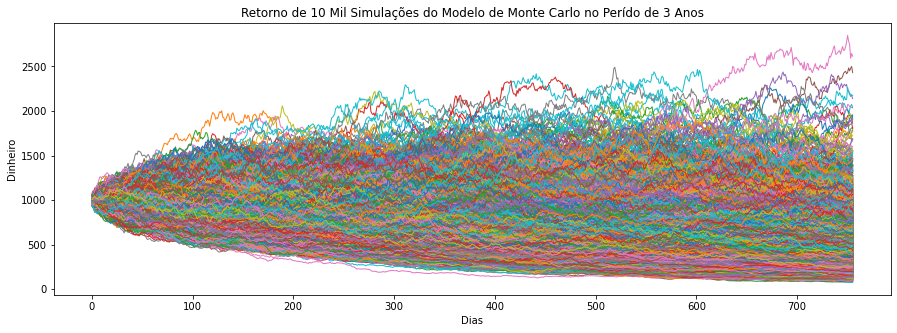

In [50]:
plt.figure(figsize =(15, 5))
plt.plot(retornos_carteira, linewidth=1)
plt.title('Retorno de 10 Mil Simulações do Modelo de Monte Carlo no Perído de 3 Anos')
plt.xlabel('Dias')
plt.ylabel('Dinheiro')

# Depois vamos salvar o gráfico em nossa pasta, "plt.savefig('selic.png', dpi = 300)"
plt.savefig('Gráfico de 10 Mil Simulações.png', dpi=300)

plt.show()

# O Gráfico abaixo mostra: Com a aplicação inicial de (1.000) o retorno chega acima (2.500) reais em 3 anos. 

### <font color='darkblue'> Vamos Criar as Estatísticas da Nossa Carteira

In [20]:
montante_99 = str(np.percentile(montante_final, 1))
montante_95 = str(np.percentile(montante_final, 5))
montante_mediano = str(np.percentile(montante_final, 50))
cenarios_com_lucro = str((len(montante_final[montante_final > 1000])/len(montante_final)) *100) + "%"  

### <font color='darkblue'> Vamos Printar Essa Análise Para Podermos Visualizar Melhor

In [27]:
print(f'''Ao investir R$ 1.000,00 na carteira {lista_acoes}, podemos 
esperara esses resultados para os próximos 3 anos, utilizando o método de Monte Carlo com 10 mil simulações):

Com 50% de probabilidade, o montante será maior que R$ {montante_mediano}.
Com 95% de probabilidade, o montante será maior que R$ {montante_95}.
Com 99% de probabilidade, o montante será maior que R$ {montante_99}.
Em {cenarios_com_lucro} dos cenários, foi possivel obter lucro nos próximos 3 anos.''')

Ao investir R$ 1.000,00 na carteira ['WEGE3.SA', 'PCAR3.SA', 'LREN3.SA', 'PETR4.SA', 'VALE3.SA'], podemos 
esperara esses resultados para os próximos 3 anos, utilizando o método de Monte Carlo com 10 mil simulações):

Com 50% de probabilidade, o montante será maior que R$ 430.4462028089904.
Com 95% de probabilidade, o montante será maior que R$ 201.94835970917052.
Com 99% de probabilidade, o montante será maior que R$ 148.84628834691117.
Em 3.44% dos cenários, foi possivel obter lucro nos próximos 3 anos.


### <font color='darkblue'> Qual a Utilidade da Simulação de Monte Carlo
    
A Partir dessa mética, é possível calcular coisas como o VAR (Value at Risk) da Carteira para diferente intervalos de confiança, e medir se o risco que você está correndo é compatível com o que você aguenda perder.

No caso dessa carteira, uma queda de 80% está dentro dos 95% dos cenários mais possíveis de acontecer nos próximos 3 anos.

### <font color='darkblue'> Vamos Plotar Um Gráfico de Distribuição dos Montantes no final das 10 Mil Simulações

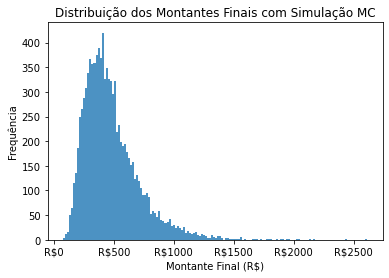

In [51]:
config = dict(histtype = "stepfilled", alpha = 0.8, density = False, bins = 150)

fig, ax = plt.subplots()
ax.hist(montante_final, **config)
ax.xaxis.set_major_formatter('R${x:.0f}')
plt.title('Distribuição dos Montantes Finais com Simulação MC')
plt.xlabel('Montante Final (R$)')
plt.ylabel("Frequência")
# Depois vamos salvar o gráfico em nossa pasta, "plt.savefig('selic.png', dpi = 300)"
plt.savefig('Gráfico de Distribuição do Montante Final das Simulações.png', dpi=300)

plt.show()

###### <font color='Red'> Projeto (03/11/2023): Simulação de Monte Carlo - William E. Santos. 